In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
data_url = "https://raw.githubusercontent.com/BTanjerine/LoanDataCSV/main/cleaned_loan_data.csv"
data = pd.read_csv(data_url)
data.head()

,Unnamed: 0,loan_status,Principal,terms,past_due_days,age,education,Gender
0,0,1,0.412489,1.080782,-0.63003,-0.686221,2,0
1,1,1,0.164971,1.080782,-0.63003,-0.564047,2,1
2,2,1,-0.082547,-0.551001,-0.63003,-0.502960,0,0
3,3,1,-0.330065,-0.551001,-0.63003,-0.808395,0,1
4,4,1,-0.577583,-0.551001,-0.63003,-0.869482,2,0


In [ ]:
data.shape

(1015, 8)

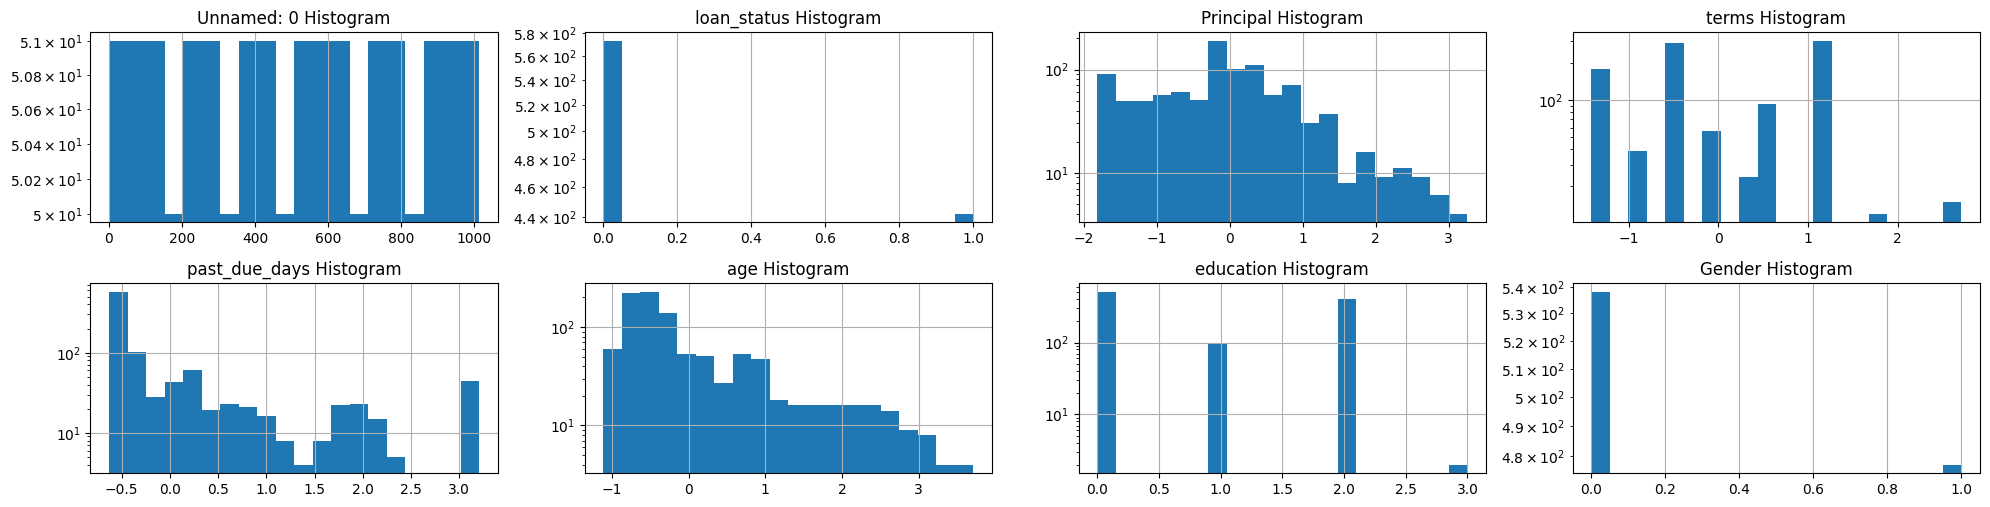

In [ ]:
fig = plt.figure(figsize=(20,20))
for i, feature in enumerate(data.columns):
    f = fig.add_subplot(8, 4, i + 1)
    data[feature].hist(bins = 20, ax = f)
    f.set_title(feature + " Histogram",)
    f.set_yscale('log')
fig.tight_layout()
plt.show()

In [ ]:
# split
X = data.iloc[:, 2:]
Y = data.iloc[:, 1]

In [ ]:
# 70 30 split on data
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7)

In [ ]:
# utilize sklearn's logistic regression model
log_model = LogisticRegression()

log_model.fit(x_train, y_train)

y_pred = log_model.predict(x_test)

In [ ]:
train_accuracy = log_model.score(x_train, y_train)
print(f'Accuracy on training set: {100 * train_accuracy:.2f}%')

test_accuracy = log_model.score(x_test, y_test)
print(f'Accuracy on testing set: {100 * test_accuracy:.2f}%')

Accuracy on training set: 96.62%
Accuracy on testing set: 94.10%


In [ ]:
metrics.confusion_matrix(y_test, y_pred)

array([[153,  11],
       [  7, 134]])

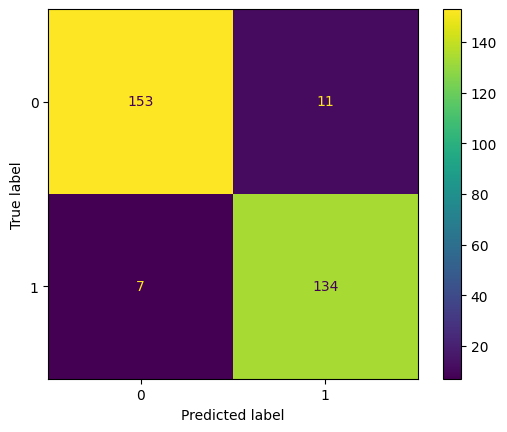

In [ ]:
actual = y_test
predicted = y_pred

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [ ]:
print(metrics.classification_report(y_test, y_pred, target_names={'denied for a loan', 'approved for a loan'}))

                     precision    recall  f1-score   support

  denied for a loan       0.96      0.93      0.94       164
approved for a loan       0.92      0.95      0.94       141

           accuracy                           0.94       305
          macro avg       0.94      0.94      0.94       305
       weighted avg       0.94      0.94      0.94       305



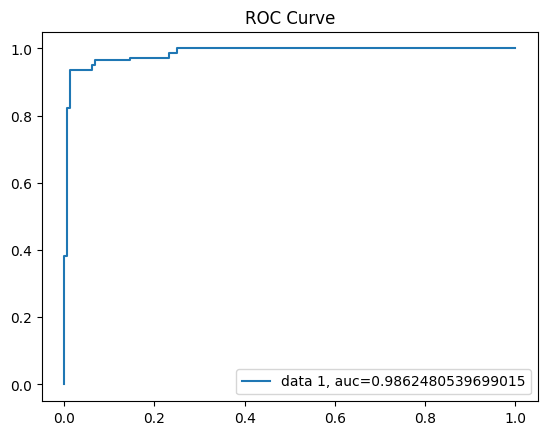

In [ ]:
y_pred_proba = log_model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.title("ROC Curve")
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
prediction = log_model.predict([
    [-1.320136914963236,-1.4212855831104827,-0.6300301044803185,-0.3807857011686823,2,1], # college,female
     [-0.08254666033343595,0.5368538938089443,0.9054909905812681,1.7572595073057038,0,0]]) # highschool, male
print(prediction)

[1 0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
